In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_error


In [2]:
path = "train.csv"
df = pd.read_csv(path)
df.head(10)

,date,store,item,sales
0,22/01/2022,2002,786536,424
1,23/01/2022,2002,786536,376
2,24/01/2022,2002,786536,300
3,25/01/2022,2002,786536,210
4,25/01/2022,2002,786536,126
5,26/01/2022,2002,786536,519
6,27/01/2022,2002,786536,577
7,28/01/2022,2002,786536,447
8,29/01/2022,2002,786536,983
9,30/01/2022,2002,786536,908


In [3]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1009 non-null   object
 1   store   1009 non-null   int64 
 2   item    1009 non-null   int64 
 3   sales   1009 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.7+ KB


In [6]:
df.shape

(1009, 4)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_col = df.select_dtypes(include='object').columns
for col in object_col:
    df[col] = le.fit_transform(df[col])
    

<Axes: >

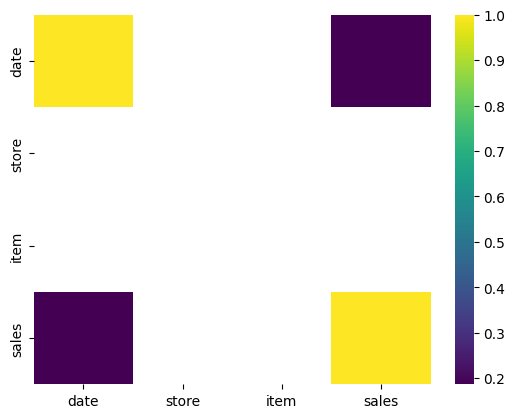

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix , annot = False , fmt = '.2f' , cmap = 'viridis')

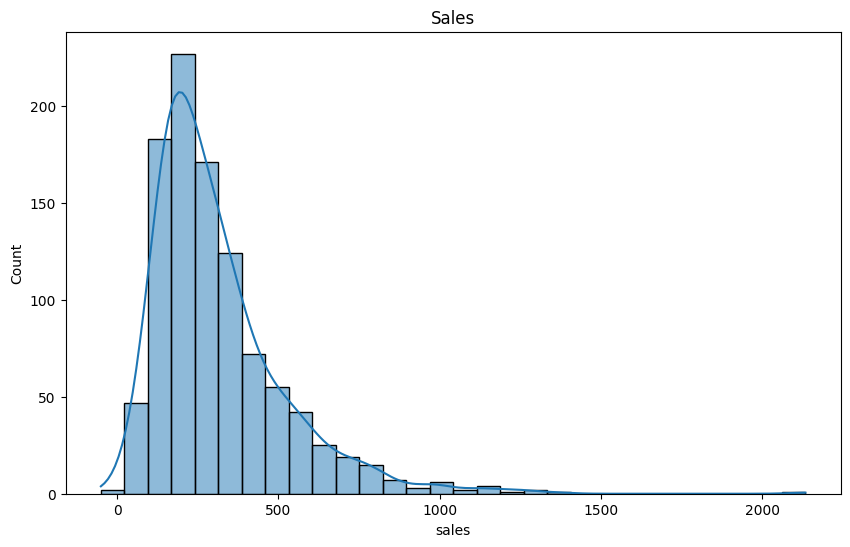

In [9]:
plt.figure(figsize=(10 ,6))
sns.histplot(df['sales'] ,bins = 30 ,kde = True)
plt.title("Sales")
plt.show()

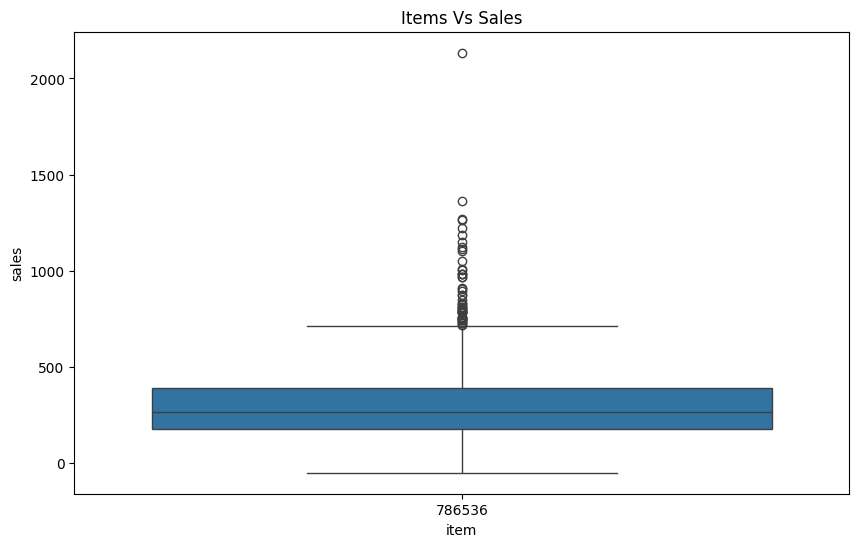

In [10]:
plt.figure(figsize=(10 ,6))
sns.boxplot(x = 'item' ,y = 'sales', data = df)
plt.title('Items Vs Sales')
plt.show()

In [11]:
X = df.drop('sales' ,axis = 1)
y = df['sales']

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 ,random_state=42)
print("Training Test Size :", X_train.shape)
print("Testing Test Size :",X_test.shape)

Training Test Size : (807, 3)
Testing Test Size : (202, 3)


In [13]:
model = LinearRegression()
model.fit(X_train , y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Model parameters:", model.get_params())

Coefficients: [0.14252357 0.         0.        ]
Intercept: 241.81630246115787
Model parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [14]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': y_test , 'predicted' : y_pred})
print(result)


     Actual   predicted
628     240  353.697309
631     343  367.379572
741     125  309.942571
514     205  249.370052
365     155  259.631749
..      ...         ...
780     326  338.019715
334     155  263.907457
210      96  285.143469
350     285  341.582805
78      341  369.089855

[202 rows x 2 columns]


In [15]:
rf = RandomForestClassifier(n_estimators=100 ,random_state=42 ,n_jobs = -1 , max_depth= None ,min_samples_split= 2 )
rf.fit(X_train , y_train)

c:\Users\mahme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
c:\Users\mahme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
c:\Users\mahme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
c:\Users\mahme\AppData\Local\Programs\Python\Python313\Lib\site-pac

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
rf_y_pred = rf.predict(X_test)
rf_result = pd.DataFrame({'Actual': y_test , 'predicted' : rf_y_pred})
print(rf_result)


     Actual  predicted
628     240        599
631     343        492
741     125        185
514     205        288
365     155        118
..      ...        ...
780     326        290
334     155        188
210      96        135
350     285        291
78      341        435

[202 rows x 2 columns]


In [21]:
print("Linear Regression Model Evaluation")

mae_LR = mean_absolute_error(y_test, y_pred)
mse_LR = mean_squared_error(y_test, y_pred)
r2_LR = r2_score(y_test, y_pred)   

print(f"Mean Absolute Error : {mae_LR:.2f}")
print(f"Mean Squared Error  : {mse_LR:.2f}")
print(f"R² Score            : {r2_LR:.4f}")


Linear Regression Model Evaluation
Mean Absolute Error : 152.37
Mean Squared Error  : 46435.26
R² Score            : 0.0236


In [22]:
print("Random Forest  Model Evaluation ")
mae_rf = mean_absolute_error(y_test , rf_y_pred)
msq_rf = mean_squared_error(y_test ,rf_y_pred)
r2_score_rf = r2_score(y_test ,rf_y_pred)

print(f"Mean Absolute Error : {mae_rf:.2f}")
print(f"Mean Squared Error {msq_rf:.2f}")
print(f"r2 Score : {r2_score_rf:.4f}")

Random Forest  Model Evaluation 
Mean Absolute Error : 190.25
Mean Squared Error 68231.32
r2 Score : -0.4347


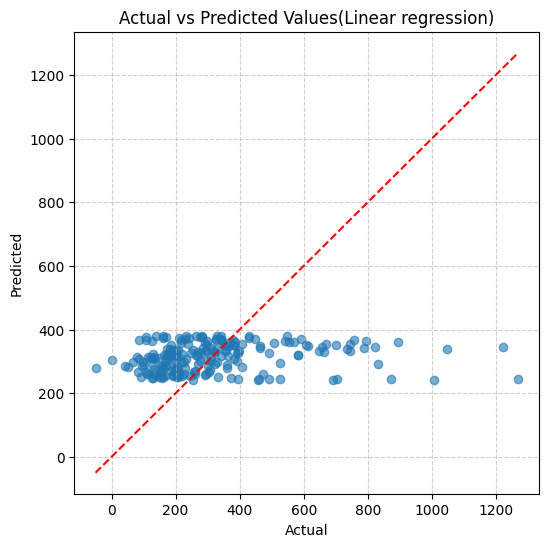

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.title("Actual vs Predicted Values(Linear regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


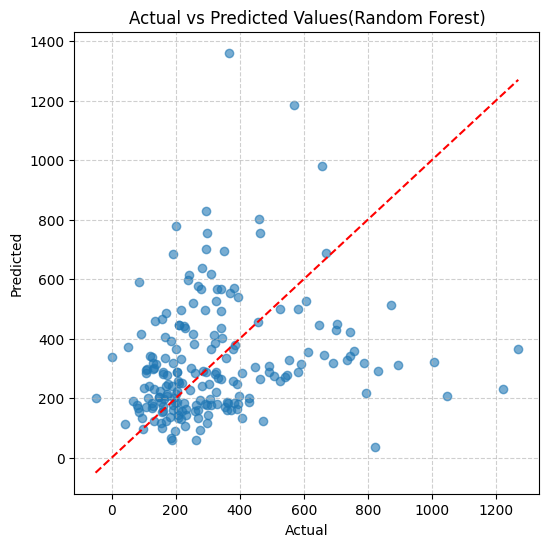

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.title("Actual vs Predicted Values(Random Forest)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


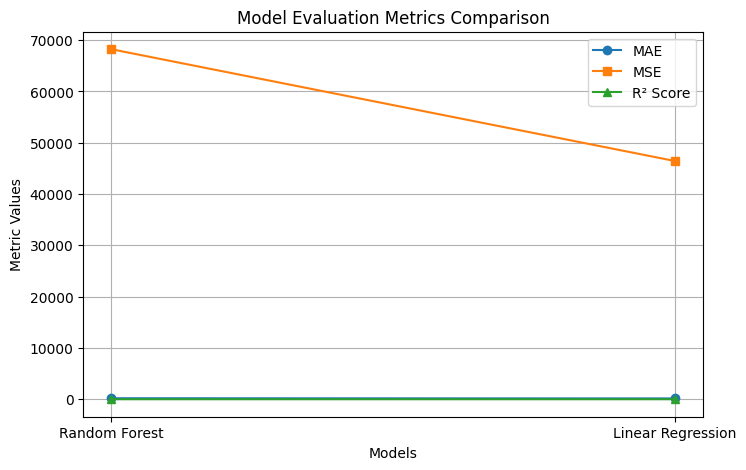

In [ ]:

models = ['Random Forest', 'Linear Regression']
mae = [190.25, 152.37]
mse = [68231.32, 46435.26]
r2 = [-0.4347, 0.0236]

plt.figure(figsize=(8,5))
plt.plot(models, mae, marker='o', label='MAE')
plt.plot(models, mse, marker='s', label='MSE')
plt.plot(models, r2, marker='^', label='R² Score')

plt.title("Model Evaluation Metrics Comparison")
plt.xlabel("Models")
plt.ylabel("Metric Values")
plt.legend()
plt.grid(True)
plt.show()
